In [5]:
!pip install clodsa

In [6]:
from matplotlib import pyplot as plt
from clodsa.augmentors.augmentorFactory import createAugmentor
from clodsa.transformers.transformerFactory import transformerGenerator
from clodsa.techniques.techniqueFactory import createTechnique
import xml.etree.ElementTree as ET
import cv2
%matplotlib inline

In [7]:
PROBLEM = "detection"
ANNOTATION_MODE = "yolo"
INPUT_PATH = "/content/sample"
GENERATION_MODE = "linear"
OUTPUT_MODE = "yolo"
OUTPUT_PATH= "augmented_images_yolo"

In [8]:
augmentor = createAugmentor(PROBLEM,ANNOTATION_MODE,OUTPUT_MODE,GENERATION_MODE,INPUT_PATH,{"outputPath":OUTPUT_PATH})

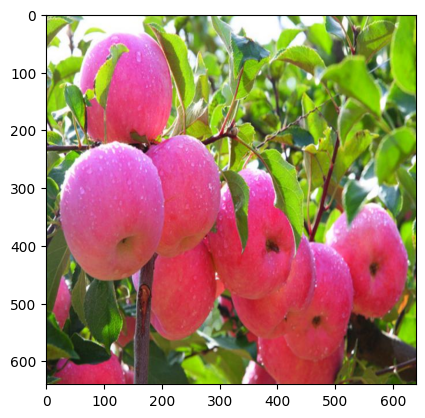

In [9]:
img = cv2.imread("/content/sample/apple_65_jpg.rf.a4d5e3032338d680097d3899304f29e1.jpg")
# changing to the BGR format of OpenCV to RGB format for matplotlib
plt.imshow(img[:,:,::-1])

In [10]:
def boxesFromYOLO(imagePath,labelPath):
    image = cv2.imread(imagePath)
    (hI, wI) = image.shape[:2]
    lines = [line.rstrip('\n') for line in open(labelPath)]
    #if(len(objects)<1):
    #    raise Exception("The xml should contain at least one object")
    boxes = []
    if lines != ['']:
        for line in lines:
            components = line.split(" ")
            if len(components) >= 5:
                category = components[0]
                x  = int(float(components[1])*wI - float(components[3])*wI/2)
                y = int(float(components[2])*hI - float(components[4])*hI/2)
                h = int(float(components[4])*hI)
                w = int(float(components[3])*wI)
                boxes.append((category, (x, y, w, h)))
    return (image,boxes)

In [11]:
categoriesColors = {11: (255,0,0),14:(0,0,255)}

def showBoxes(image,boxes):
    cloneImg = image.copy()
    for box in boxes:
        if(len(box)==2):
            (category, (x, y, w, h))=box
        else:
            (category, (x, y, w, h),_)=box
        if int(category) in categoriesColors.keys():
            cv2.rectangle(cloneImg,(x,y),(x+w,y+h),categoriesColors[int(category)],5)
        else:
            cv2.rectangle(cloneImg,(x,y),(x+w,y+h),(0,255,0),2)
    plt.imshow(cloneImg[:,:,::-1])


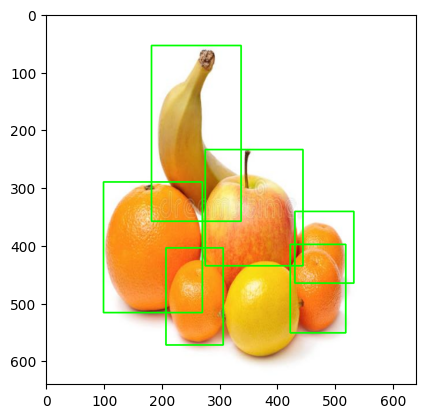

In [12]:
img,boxes = boxesFromYOLO("/content/sample/mixed_21_jpg.rf.45a9da207d5cac5d3c232df289ce1dda.jpg","/content/sample/mixed_21_jpg.rf.45a9da207d5cac5d3c232df289ce1dda.txt")
showBoxes(img,boxes)

In [13]:
transformer = transformerGenerator(PROBLEM)


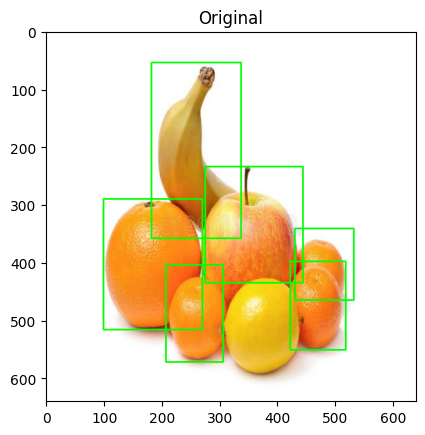

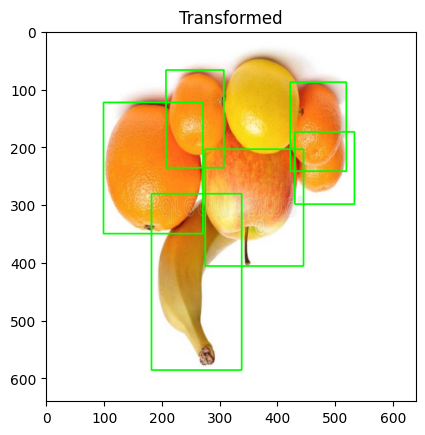

In [14]:
vFlip = createTechnique("flip",{"flip":0})
augmentor.addTransformer(transformer(vFlip))
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
vFlipGenerator = transformer(vFlip)
vFlipImg,vFlipBoxes = vFlipGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(vFlipImg,vFlipBoxes)

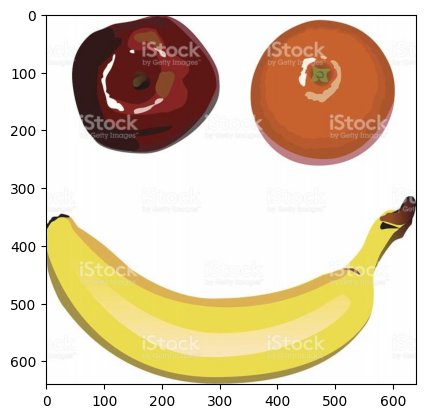

In [15]:
img = cv2.imread("/content/sample/mixed_22_jpg.rf.3eaae6b55088f420ac79fd1e650fb3a9.jpg")
# changing to the BGR format of OpenCV to RGB format for matplotlib
plt.imshow(img[:,:,::-1])

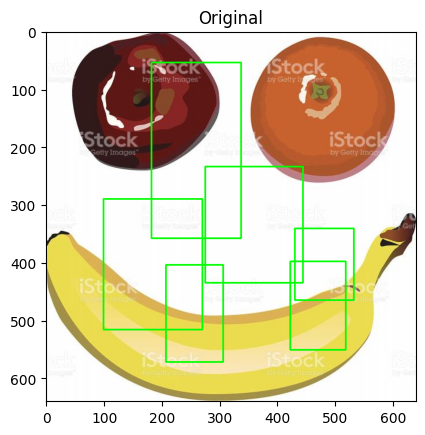

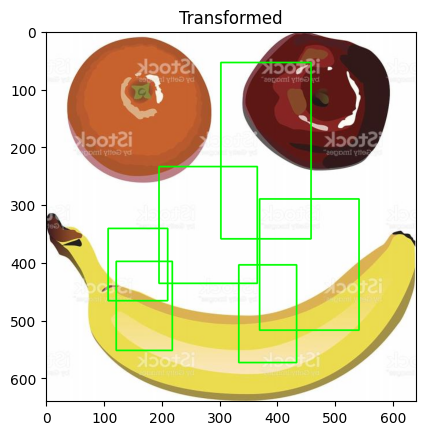

In [16]:
hFlip = createTechnique("flip",{"flip":1})
augmentor.addTransformer(transformer(hFlip))
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
hFlipGenerator = transformer(hFlip)
hFlipImg,hFlipBoxes = hFlipGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(hFlipImg,hFlipBoxes)

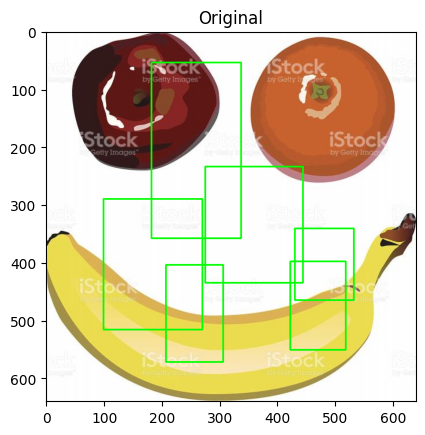

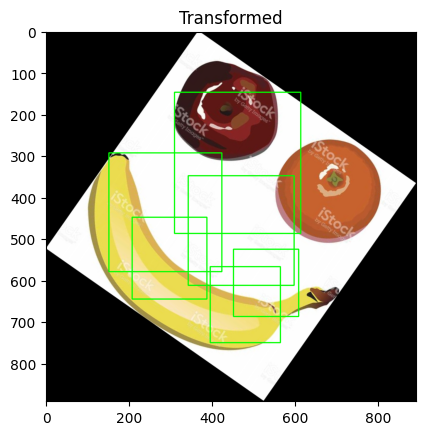

In [17]:
rotate = createTechnique("rotate", {"angle" : 35})
augmentor.addTransformer(transformer(rotate))
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
rotateGenerator = transformer(rotate)
rotateImg,rotateBoxes = rotateGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(rotateImg,rotateBoxes)

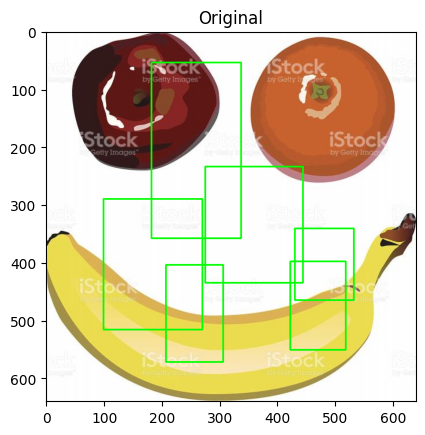

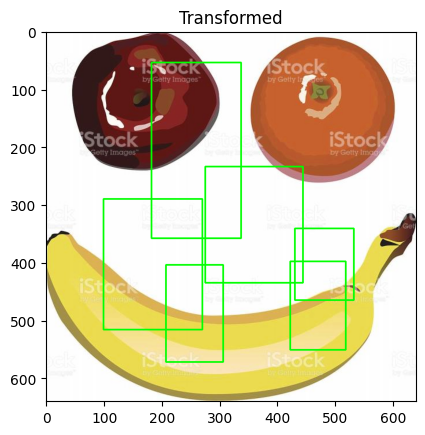

In [19]:
rotate = createTechnique("raise_hue", {"power" : 0.99})
augmentor.addTransformer(transformer(rotate))
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
rotateGenerator = transformer(rotate)
rotateImg,rotateBoxes = rotateGenerator.transform(img,boxes)
plt.figure()
plt.title("Transformed")
showBoxes(rotateImg,rotateBoxes)

In [20]:
none = createTechnique("none",{})
augmentor.addTransformer(transformer(none))

In [21]:
augmentor.applyAugmentation()

In [22]:
print("Number of images in the folder")
!ls -1 augmented_images_yolo/*.jpg | wc -l
print("Number of annotations in the folder")
!ls -1 augmented_images_yolo/*.txt | wc -l

Number of images in the folder
36
Number of annotations in the folder
36


In [23]:
!zip -r augmented_images_yolo.zip augmented_images_yolo
from google.colab import files
files.download('/content/augmented_images_yolo.zip')

  adding: augmented_images_yolo/ (stored 0%)
  adding: augmented_images_yolo/5_1_mixed_23_jpg.rf.3353278cdb6f6c8c9de021fa2a4e70ec.jpg (deflated 7%)
  adding: augmented_images_yolo/1_5_apple_65_jpg.rf.a4d5e3032338d680097d3899304f29e1.jpg (deflated 4%)
  adding: augmented_images_yolo/1_4_apple_65_jpg.rf.a4d5e3032338d680097d3899304f29e1.txt (deflated 32%)
  adding: augmented_images_yolo/4_2_mixed_22_jpg.rf.3eaae6b55088f420ac79fd1e650fb3a9.jpg (deflated 7%)
  adding: augmented_images_yolo/3_3_mixed_25_jpg.rf.ad222ac9781a1d645201f2d6fd3254ef.txt (deflated 45%)
  adding: augmented_images_yolo/3_0_mixed_25_jpg.rf.ad222ac9781a1d645201f2d6fd3254ef.txt (deflated 42%)
  adding: augmented_images_yolo/0_2_mixed_24_jpg.rf.a1e785fdacfcc35524c9630e7c383b71.jpg (deflated 7%)
  adding: augmented_images_yolo/1_0_apple_65_jpg.rf.a4d5e3032338d680097d3899304f29e1.txt (deflated 38%)
  adding: augmented_images_yolo/0_1_mixed_24_jpg.rf.a1e785fdacfcc35524c9630e7c383b71.jpg (deflated 6%)
  adding: augmented_imag

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
# Install required packages
!pip install -q albumentations==1.3.1 opencv-python matplotlib

# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A
import os
from google.colab import files
import io
import PIL.Image

# Upload images and YOLO labels
print("Upload images and YOLO labels:")
uploaded = files.upload()

# Create output directory
os.makedirs("augmented", exist_ok=True)

# Define augmentations
transformations = [
    A.HorizontalFlip(p=1),
    A.VerticalFlip(p=1),
    A.RandomBrightnessContrast(p=1),
    A.Rotate(limit=30, p=1),
    A.Blur(blur_limit=3, p=1),
    A.RGBShift(p=1)
]

# Function to draw bounding boxes (using pascal_voc format for plotting)
def draw_boxes(img, boxes, labels):
    img_draw = img.copy()
    for box, cls in zip(boxes, labels):
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(img_draw, (x1, y1), (x2, y2), (0,255,0), 2)
        cv2.putText(img_draw, str(cls), (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)
    return img_draw

# Process each uploaded file
image_files = [f for f in uploaded.keys() if f.lower().endswith((".jpg", ".jpeg", ".png"))]

for image_file in image_files:
    base_name = os.path.splitext(image_file)[0]
    label_file = f"{base_name}.txt"

    # Check if corresponding label file was uploaded
    if label_file not in uploaded:
        print(f"Warning: Skipping image '{image_file}' as no corresponding label file '{label_file}' was uploaded.")
        continue

    # Load image
    img_bytes = uploaded[image_file]
    img = PIL.Image.open(io.BytesIO(img_bytes)).convert("RGB")
    img_np = np.array(img)
    height, width = img_np.shape[:2]

    # Load YOLO labels
    boxes_yolo = []
    class_ids = []
    label_bytes = uploaded[label_file]
    label_content = label_bytes.decode('utf-8')
    for line in label_content.strip().split('\n'):
        if line: # Avoid processing empty lines
            cls, cx, cy, w, h = map(float, line.split())
            x_min = (cx - w/2) * width
            y_min = (cy - h/2) * height
            x_max = (cx + w/2) * width
            y_max = (cy + h/2) * height
            boxes_yolo.append([x_min, y_min, x_max, y_max])
            class_ids.append(int(cls))


    # Apply each augmentation
    for i, aug in enumerate(transformations, start=1):
        transform = A.Compose([aug], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['class_labels']))
        augmented = transform(image=img_np, bboxes=boxes_yolo, class_labels=class_ids)

        aug_img = augmented['image']
        aug_boxes = augmented['bboxes']
        aug_labels = augmented['class_labels']

        # Convert to YOLO format
        yolo_lines = []
        for box, cls in zip(aug_boxes, aug_labels):
            x_min, y_min, x_max, y_max = box
            # Calculate center x, center y, width, and height
            cx = (x_min + x_max) / 2.0 / width
            cy = (y_min + y_max) / 2.0 / height
            bw = (x_max - x_min) / width
            bh = (y_max - y_min) / height
            yolo_lines.append(f"{cls} {cx:.6f} {cy:.6f} {bw:.6f} {bh:.6f}")


        # Save augmented image and label
        out_img_name = f"{base_name}_aug{i}.jpg"
        out_lbl_name = f"{base_name}_aug{i}.txt"

        cv2.imwrite(os.path.join("augmented", out_img_name), cv2.cvtColor(aug_img, cv2.COLOR_RGB2BGR))
        with open(os.path.join("augmented", out_lbl_name), 'w') as f:
            f.write("\n".join(yolo_lines))

print("Augmentation complete. Check 'augmented' folder for output files.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.7/125.7 kB 1.3 MB/s eta 0:00:00
Upload images and YOLO labels:


Saving augmented_images_yolo (1).zip to augmented_images_yolo (1).zip
Augmentation complete. Check 'augmented' folder for output files.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 45.0 MB/s eta 0:00:00


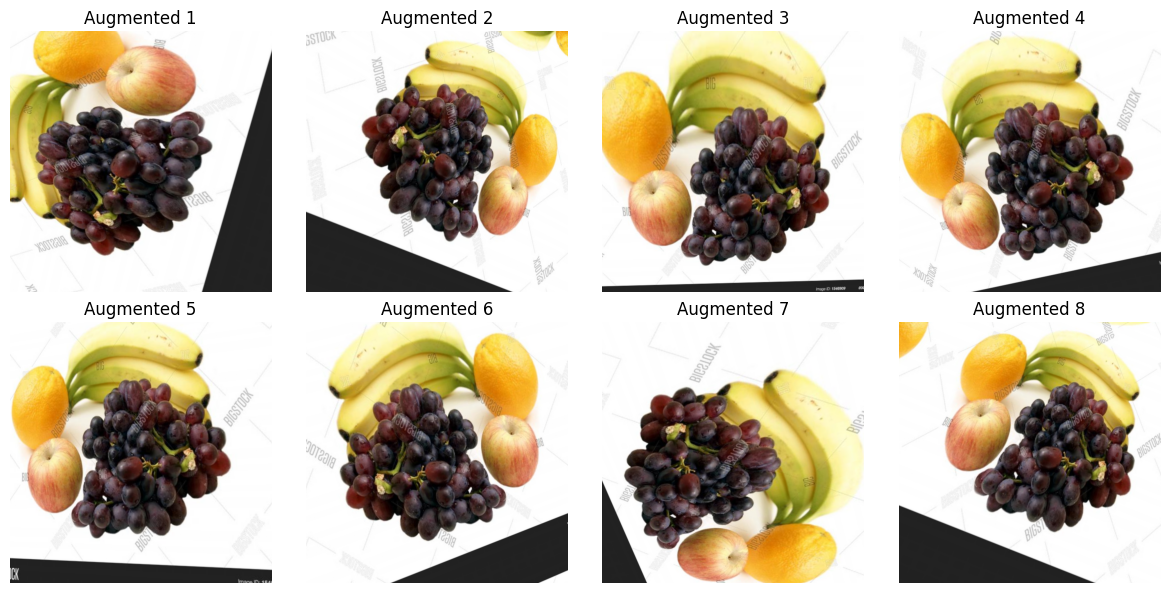

In [25]:
# Install fastai if not already
!pip install -q fastai

# Imports
from fastai.vision.all import *
import matplotlib.pyplot as plt
from pathlib import Path

# Load image as float tensor
img_path = Path("/content/sample/mixed_23_jpg.rf.3353278cdb6f6c8c9de021fa2a4e70ec.jpg")
img = PILImage.create(img_path)
img_tensor = ToTensor()(img).float() / 255.  # Convert to float in range [0,1]

# Add batch dimension
img_tensor = img_tensor.unsqueeze(0)  # Shape: [1, 3, H, W]

# Define augmentation pipeline
aug_pipeline = aug_transforms(
    size=img.size,
    do_flip=True,
    flip_vert=True,
    max_rotate=30,
    max_zoom=1.2,
    max_lighting=0.5,
    max_warp=0.2,
    p_affine=1.0,
    p_lighting=1.0
)

# Wrap in Pipeline
tfms = Pipeline(aug_pipeline)

# Plot 8 augmentations
fig, axs = plt.subplots(2, 4, figsize=(12, 6))
for i, ax in enumerate(axs.flatten()):
    aug_img_tensor = tfms(img_tensor.clone())[0]  # Remove batch dim
    show_image(aug_img_tensor, ax=ax, title=f"Augmented {i+1}")
plt.tight_layout()
plt.show()
